In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.8_Hierarchical Clustering/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.8_Hierarchical Clustering/Output')
cur_date = "042321"

library(readxl)
library(janitor)
library(tidyverse)

#reading in file
NLF_data <- data.frame(read_excel("NLF_042321.xlsx"))
NELF_data <- data.frame(read_excel("NELF_042321.xlsx"))
Sputum_data <- data.frame(read_excel("Sputum_042321.xlsx"))
Serum_data <- data.frame(read_excel("Serum_042321.xlsx"))


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(NLF_data)

,Protein,NS_1,NS_2,NS_3,NS_4,NS_5,NS_6,NS_7,NS_8,NS_9,NS_10,NS_11,NS_12,NS_13,NS_14
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,IFNg,0.2638601,0.00000000,0.1494616,0.8951656,5.8186862,0.3636737,0.8036332,1.4807508,0.01754746,0.4323116,0.24860903,1.8025665,1.7756286,1.5545991
2,IL10,0.1734701,0.24341949,0.1561912,0.1550925,0.3022863,0.1194807,0.1833912,1.1451618,0.06902558,0.1682226,0.08642643,0.3754869,0.3477679,0.5740857
3,IL12p70,0.0000000,0.08310156,0.0000000,0.5869011,1.0878560,0.0000000,0.6653735,0.5077944,0.00000000,0.2376845,0.00000000,0.0000000,0.4038254,0.5678858
4,IL13,2.9429605,1.81383869,1.9203822,1.4663503,2.4367425,0.7083544,2.1002423,3.2091820,1.26760238,2.1378485,1.68505656,3.9701160,3.4602209,3.4998466
5,IL1b,4.3961852,1.66796502,2.7942119,1.8379987,2.2833227,2.7561931,3.3595792,4.6697825,2.55216341,4.4253211,3.09334665,5.2932701,2.4326475,3.4421248
6,IL6,1.2804834,0.73279475,1.0288439,1.3561984,6.0820747,0.9752316,2.0312730,2.2665430,0.92057630,1.5871278,0.21663291,1.8944404,2.3337806,3.9169902


#insert something about clustering

In [3]:
#set.seed(7) not sure if I need this
get_hc = function(df){
    df = df %>%
        column_to_rownames(var = "Protein")
    #transposing to scale to normalize data
    t_df = t(df) %>%
        scale() 
    
    #need to transpose back 
    final_df = t(t_df) %>%
        as.data.frame() %>%
        drop_na() #background filter removing nondetect rows
    
    #calculating euclidean dist
    dist_matrix <- dist(final_df, method = 'euclidean')
    
    #getting clusters
    cytokines_hc = hclust(dist_matrix, method = 'average')
    
    return(cytokines_hc)
}

#calling fn
NLF_hc = get_hc(NLF_data)
NELF_hc = get_hc(NELF_data)
Sputum_hc = get_hc(Sputum_data)
Serum_hc = get_hc(Serum_data)

# Dendograms

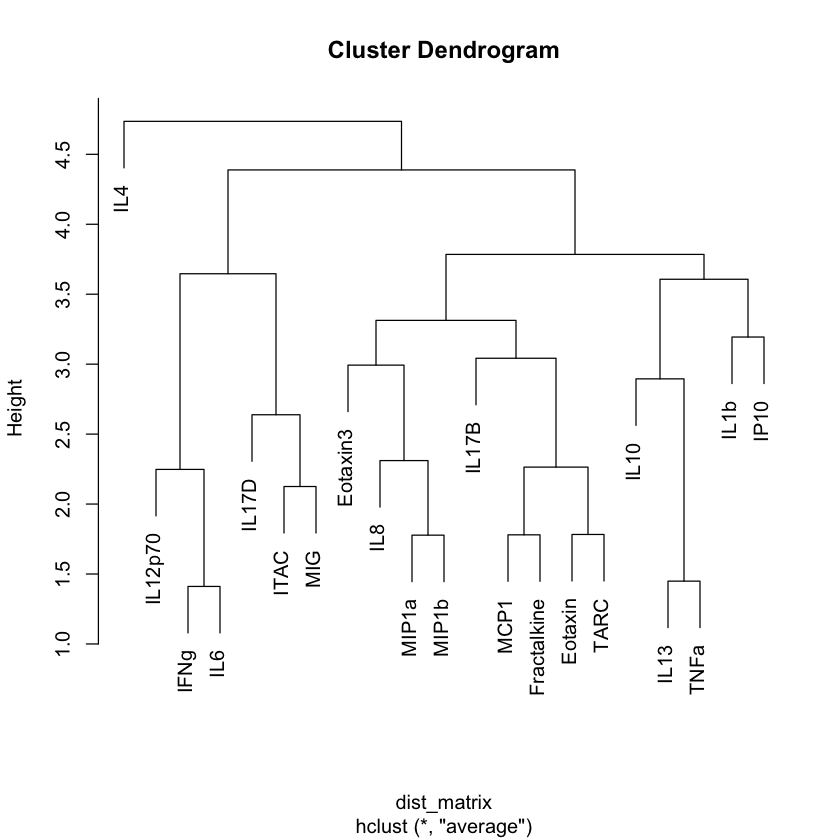

In [4]:
plot(NLF_hc)

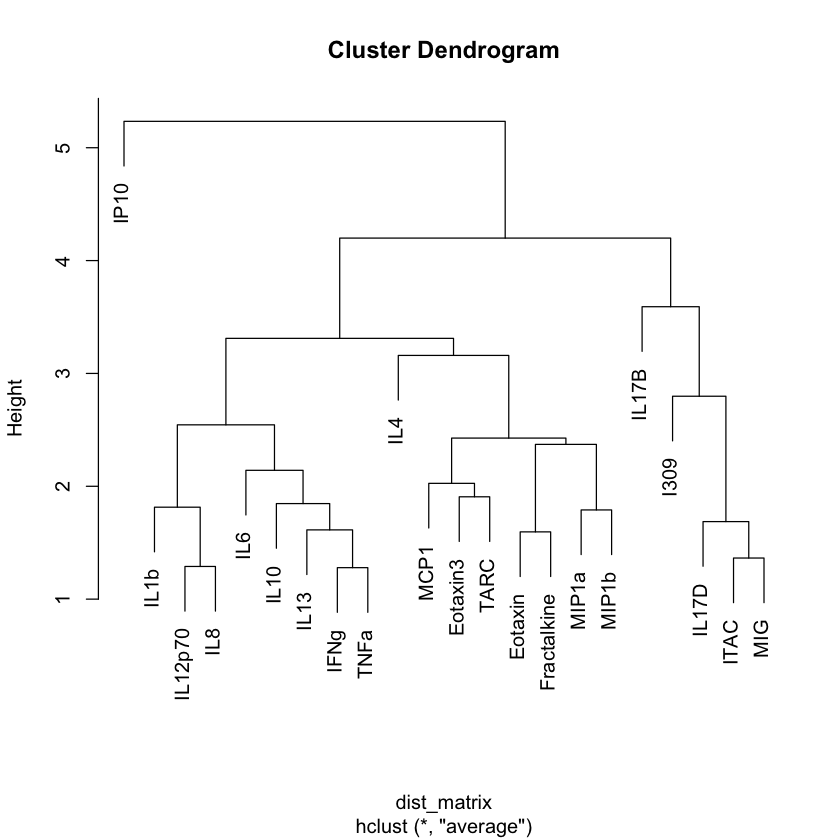

In [5]:
plot(NELF_hc)

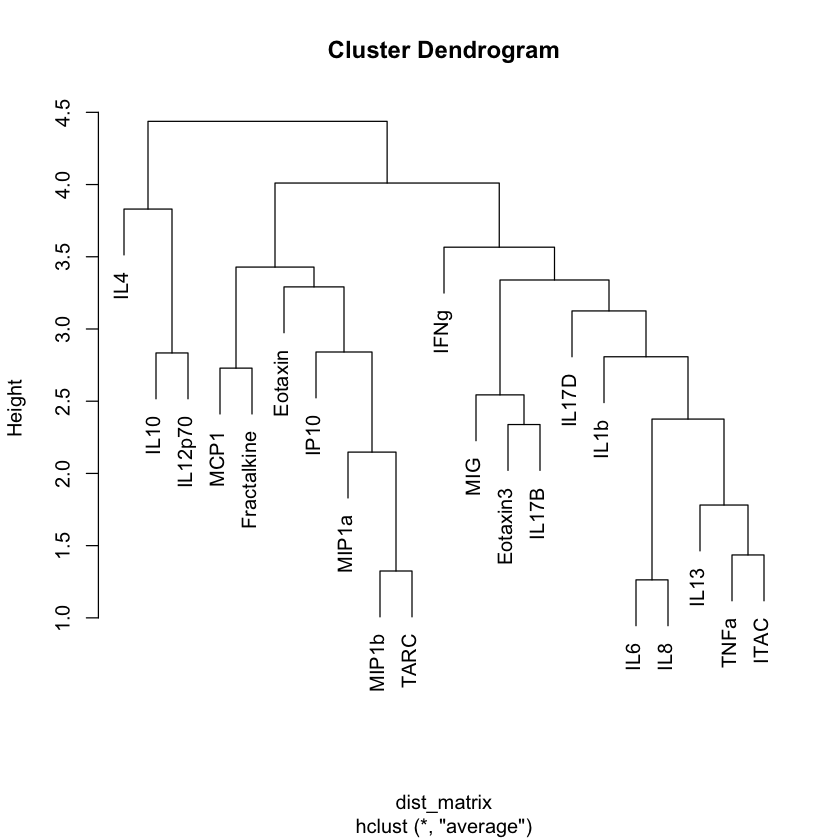

In [6]:
plot(Sputum_hc)

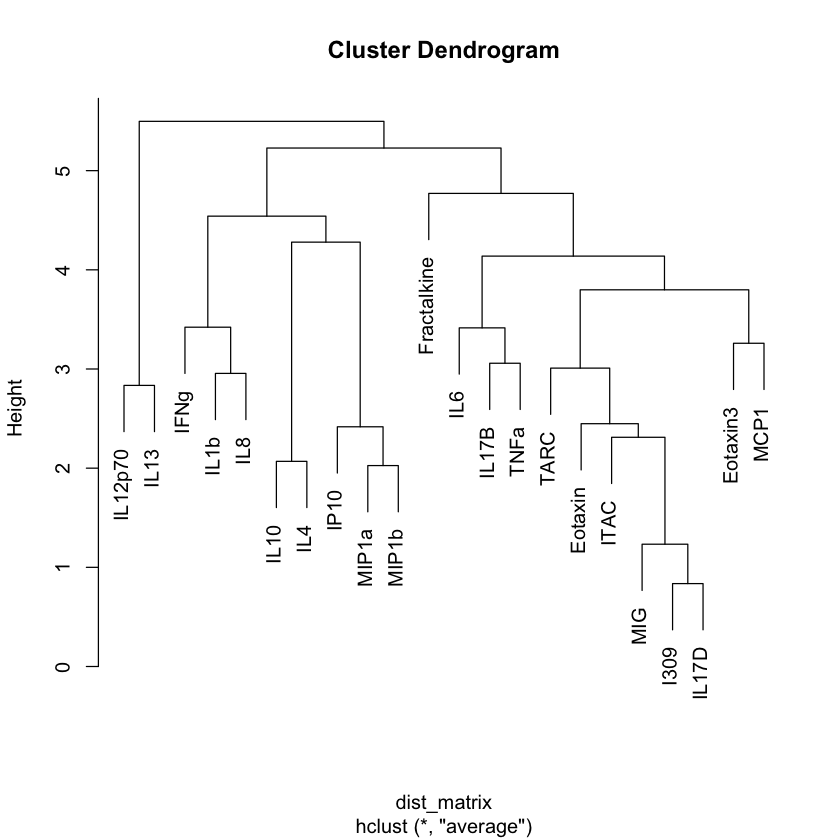

In [7]:
plot(Serum_hc)